# 서울특별시 공공자전거 따릉이 대여이력 분석

* 자전거 반납과 대여는 같은 곳에서 일어날까요? 또 대여가 많은 상위 대여소는 시간대별로 반납과 대여량이 어떤 차이가 있을까요? 대중교통이 편리한 곳과 그렇지 않은 곳의 대여소의 대여량은 시간대별로 어떤 차이를 나타낼까요? 다양한 가설을 세우고 크롤링한 데이터와 공공데이터를 활용해 분석을 해봅니다.


## 데이터 출처 :
* 서울특별시 공공자전거 대여이력 정보
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

* `(이달의주요공개정보)_서울_공공자전거(따릉이)_이용현황 자료(161021).xlsx (1.24MB)`
https://opengov.seoul.go.kr/anspruch/10045476


## 관련자료 

* ['따릉이' 타고 가장 많이 다닌 경로는? - 통플러스](http://news.tongplus.com/site/data/html_dir/2018/10/24/2018102402585.html)
* [[ONE SHOT] 따릉이, ‘이곳’서 가장 많이 빌리고 ‘여기’서 가장 많이 탄다](https://news.joins.com/article/23003297)
* [(석간) 서울시 따릉이 회원 62만 돌파 출 퇴근시간 38% 집중](http://spp.seoul.go.kr/main/news/news_report.jsp#view/253821)
* [공공자전거 따릉이 인기 따라 '따세권' 형성…소외지역도 :: 공감언론 뉴시스통신사 ::](http://www.newsis.com/view/?id=NISX20180706_0000356247&cID=10201&pID=10200)
* [서울특별시 빅데이터 캠퍼스 > 분석결과/사례공유 > 서울시 분석사례 > 서울시 자전거 이동경로 분석](https://bigdata.seoul.go.kr/noti/selectNoti.do?r_id=P430&bbs_seq=229&sch_type=&sch_text=&currentPage=1)
* [따릉이 편리하게 이용하기 위한 14가지 | 서울시 정보소통광장(정보공개)](https://opengov.seoul.go.kr/mediahub/15085803)

## 사용할 도구 가져오기

In [1]:
# 데이터 분석을 위해 pandas를
# 수치계산을 위해 numpy를
# 시각화를 위해 seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화 도구 설정

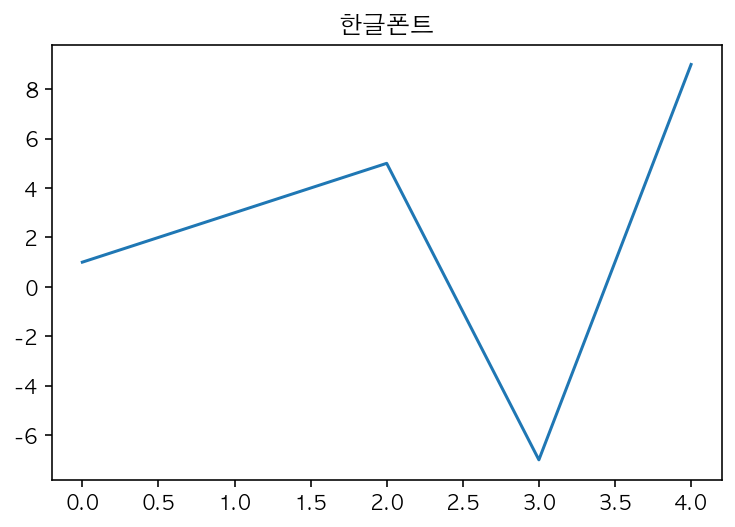

In [8]:
# 한글폰트 설정
# plt.rc("font", family="Malgun Gothic")
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

In [7]:
# 레티나 디스플레이 설정

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 데이터 불러오기
* 서울시정보소통광장에서 다운로드 받은 csv파일과 크롤링해온 대여소 정보가 있습니다.
* 이 노트북에서는 전체 데이터 중 일부 데이터만을 사용해서 특정 시기의 데이터만 분석해 보고 점점 더 큰 데이터를 로드해서 분석합니다.
* 다음의 위치에서 2017년 대여 이력을 다운로드 합니다. 
    * https://drive.google.com/open?id=1ZQX0U6DnwKMVNWKnJghwUdt5iM89ZMa6

In [12]:
# read_csv를 통해 데이터를 불러옵니다.
# 데이터를 불러왔으면 shape를 통해 크기를 출력해 봅니다.
df = pd.read_csv("data/seoul-bike-2017.csv", low_memory=False)
df.shape

(4975954, 11)

* 2018년 데이터는 1G가 넘습니다. 
* 파일의 크기가 크기 때문에 2017년 데이터로 실습 후 과제로 2018년 데이터를 로드해서 보시길 권장드립니다.
* 2018년 데이터 https://drive.google.com/open?id=1f7dnGVgCTxdn8k6ak3gBaymcdGV_0v6W

## 데이터 미리보기 및 요약하기
* head와 tail을 통해 데이터 미리보기를 해볼 수 있습니다.
* head는 데이터의 윗부분을 tail은 데이터의 하단부를 미리보기 해줍니다. 
* 괄호안에 숫자를 넣어주면 해당 숫자만큼의 데이터를 가져옵니다. 기본값은 5입니다.

In [13]:
# head 로 미리보기를 합니다.
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-00230,2017-01-01 0:00,419,홈플러스 앞,5,2017-01-01 0:21,914,새절역 2번출구,18,20,3340
1,SPB-02803,2017-01-01 0:01,825,서빙고동 주민센터 앞,2,2017-01-01 0:15,822,이촌1동 마을공원,7,14,3380
2,SPB-03956,2017-01-01 0:05,906,연신내역 5번출구150M 아래,1,2017-01-01 0:16,931,역촌파출소,6,11,1610
3,SPB-02864,2017-01-01 0:05,906,연신내역 5번출구150M 아래,9,2017-01-01 0:29,912,응암오거리,1,24,3620
4,SPB-01388,2017-01-01 0:05,330,청계천 한빛광장,6,2017-01-01 0:23,171,임광빌딩 앞,9,17,2280


In [14]:
# tail로 미리보기를 합니다.
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
4975949,SPB-09854,2017-12-31 23:58:55,549,아차산역 3번출구,9,2018-01-01 00:09:39,592,건국대학교 학생회관,12,10,2280
4975950,SPB-01013,2017-12-31 23:58:56,1404,동일로 지하차도,2,2018-01-01 00:33:01,1414,사가정역 1번출구,7,33,4070
4975951,SPB-03956,2017-12-31 23:59:00,341,혜화역 3번출구 뒤,2,2018-01-01 00:49:23,358,성대입구 사거리,8,49,7240
4975952,SPB-00296,2017-12-31 23:59:46,1211,방이삼거리,1,2018-01-01 00:07:18,1211,방이삼거리,1,7,0
4975953,SPB-11004,2017-12-31 23:59:49,1445,용마지구대,1,2018-01-01 00:17:35,602,장안동 사거리,10,16,2310


## 데이터프레임 요약하기
* info를 사용하면 해당 데이터의 요약정보를 볼 수 있습니다.
* 데이터의 갯수와 데이터의 타입, 크기 등을 볼 수 있습니다.

In [15]:
# info를 통해 요약정보를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975954 entries, 0 to 4975953
Data columns (total 11 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   자전거번호    object
 1   대여일시     object
 2   대여대여소번호  object
 3   대여대여소명   object
 4   대여거치대    int64 
 5   반납일시     object
 6   반납대여소번호  object
 7   반납대여소명   object
 8   반납거치대    int64 
 9   이용시간(분)  int64 
 10  이용거리(M)  int64 
dtypes: int64(4), object(7)
memory usage: 417.6+ MB


In [20]:
# 수치데이터에 대한 요약을 봅니다. 여기에서는 "이용시간(분)", "이용거리(M)"을 요약합니다.
df[["이용시간(분)", "이용거리(M)"]].describe().round(2)

,이용시간(분),이용거리(M)
count,4975954.00,4975954.00
mean,28.66,3657.88
std,30.85,4752.43
min,2.00,0.00
25%,8.00,1140.00
50%,18.00,2220.00
75%,40.00,4590.00
max,2582.00,255990.00


In [21]:
# np.object 를 사용하면 object 타입의 데이터를 요약할 수 있습니다.
# 수치 데이터에 대한 요약과 문자 데이터에 대한 요약값이 다름을 확인합니다.
df.describe(include="object")

,자전거번호,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명
count,4975954,4975954,4975954,4975806,4975954,4975954,4975779
unique,13014,4008622,1043,1042,4007431,1048,1047
top,SPB-05917,2017-06-02 19:46:32,207,여의나루역 1번출구 앞,2017-03-19 15:55,207,여의나루역 1번출구 앞
freq,983,86,54174,54174,109,52675,52675


## 분석을 위한 전처리
* 위에서 데이터를 미리보기 했을 때 컬럼과 데이터에 불필요한 홑따옴표가 포함되어 있습니다.
* 전처리를 통해 제거해 줍니다.
* object 타입의 데이터에는 모두 홑따옴표가 들어가 있습니다. 따라서 object 데이터 타입이라면 홑따옴표를 제거해 주도록 합니다.
* 아래 코드는 데이터를 병합하면서 처리했습니다. 병합 전의 데이터를 불러와서 전처리 하고자 할 때는 주석을 풀고 사용하면 됩니다.

In [ ]:
# 컬럼에 있는 '를 제거합니다.
# df.columns = df.columns.str.strip("'")

In [ ]:
# 일부 데이터에 불필요하게 '가 들어가 있습니다. 스트링 타입으로 되어있는 데이터에서 '을 제거합니다.
# 2018년 전체 데이터를 모아놓은 csv에서는 미리 제거해서 넣어두었습니다.
# 다른 파일을 가져와서 분석할 때 아래 코드를 활용합니다.
# df = df.apply(lambda x: x.str.strip("'") if x.dtype == np.dtype('object') else x)

# 다음의 방법으로 제거할 수도 있습니다.
# df.iloc[:, :4] = df.iloc[:, :4].apply(lambda x: x.str.strip("'"))
# df.iloc[:, 5:8] = df.iloc[:, 5:8].apply(lambda x: x.str.strip("'"))

## 결측치 보기

In [22]:
# isnull과 sum을 활용합니다.
df.isnull().sum()

자전거번호        0
대여일시         0
대여대여소번호      0
대여대여소명     148
대여거치대        0
반납일시         0
반납대여소번호      0
반납대여소명     175
반납거치대        0
이용시간(분)      0
이용거리(M)      0
dtype: int64

In [25]:
df[df["반납대여소명"].isnull()]

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
734171,SPB-02364,2017-05-05 13:01:36,511,서울숲역 4번 출구 옆,2,2017-05-05 15:56:54,중랑정비팀test 1005,NaN,3,175,18500
734208,SPB-04679,2017-05-05 13:04:31,511,서울숲역 4번 출구 옆,4,2017-05-05 15:56:28,중랑정비팀test 1005,NaN,4,171,19330
735030,SPB-05821,2017-05-05 14:04:07,1021,강일동 리슈빌 빌딩앞,9,2017-05-05 15:02:15,중랑정비팀test 1005,NaN,1,57,9430
736346,SPB-04196,2017-05-05 15:18:06,중랑정비팀test 1005,NaN,8,2017-05-05 20:18:56,중랑정비팀test 1005,NaN,10,300,40540
738538,SPB-04199,2017-05-05 16:59:47,1016,해뜨는 주유소옆 리엔파크 109동앞,7,2017-05-05 17:37:47,중랑정비팀test 1005,NaN,5,37,2060
...,...,...,...,...,...,...,...,...,...,...,...
1183195,SPB-04946,2017-06-04 20:54:27,1006,롯데캐슬 115동앞,6,2017-06-04 21:30:03,중랑정비팀test 1005,NaN,1,35,2160
1186176,SPB-01914,2017-06-04 23:19:23,1006,롯데캐슬 115동앞,1,2017-06-04 23:59:40,중랑정비팀test 1005,NaN,1,40,0
1186288,SPB-04876,2017-06-04 23:28:13,1021,강일동 리슈빌 빌딩앞,14,2017-06-04 23:35:08,중랑정비팀test 1005,NaN,1,6,1600
1186843,SPB-05227,2017-06-05 00:23:57,1013,강동구청역 1번 출입구,6,2017-06-05 01:04:05,중랑정비팀test 1005,NaN,6,39,7260


In [27]:
df.loc[df["반납대여소명"].isnull(), "반납대여소번호"].unique()

array(['중랑정비팀test 1005'], dtype=object)

## 대여소별 대여|반납 현황

In [29]:
# unique 는 중복을 제거한 데이터를 집계합니다. 
# nunique는 중복을 제거한 데이터의 수를 세어줍니다.
# 대여와 반납이 되는 대여소의 수를 세어봅니다.
print('# 대여소 수  ')
print('대여 대여소: ', df["대여대여소명"].nunique() )
print('반납 대여소: ', df["반납대여소명"].nunique())

# 대여소 수  
대여 대여소:  1042
반납 대여소:  1047


In [32]:
# 대여대여소의 대여횟수 하위 10개를 가져와 봅니다.
df["대여대여소명"].value_counts().sort_values().head(10)

 서울연신초등학교           1
 삼환로즈빌아파트 105동 옆    1
 레이크팰리스 동문우측        1
 LG전자베스트샵 신정점       1
 금암 문화공원            1
 연신내역 1번 출구         1
 기자촌 사거리            1
 상림마을 롯데캐슬2단지 옆     1
 강남 을지병원 교차로        2
 파르코 앞              3
Name: 대여대여소명, dtype: int64

In [40]:
# 대여대여소명이 결측치가 아닌 값에서 "파르코" 라는 명칭이 들어가는 대여소만 가져옵니다.
# p 값이 True False 로 되어 있기 때문에 p라는 변수에 담아줍니다.
p = df.loc[df["대여대여소명"].notnull(), "대여대여소명"].str.contains("파르코")

In [45]:
# p에서 True 인 값의 인덱스 값만 찾습니다.
p_index = p[p == True].index
p_index

Int64Index([4901984, 4910012, 4972540], dtype='int64')

In [46]:
# df.loc[p[p == True].index]
df.loc[p_index]

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
4901984,SPB-10419,2017-12-17 21:41:34,1652,파르코 앞,1,2017-12-17 21:48:00,1628,노일초등학교 앞,10,6,780
4910012,SPB-10190,2017-12-20 02:42:41,1652,파르코 앞,2,2017-12-20 03:13:36,1637,KT 노원점 건물 앞,1,30,3350
4972540,SPB-07378,2017-12-31 03:15:22,1652,파르코 앞,3,2017-12-31 03:32:30,1656,중앙하이츠 아파트 입구,1,15,0


* 대여 대여소번호에 상암센터 정비실과 위트콤 같은 숫자가 아닌 곳들이 있습니다.

In [49]:
# value_counts를 통해 대여량이 많은 상위 10개 대여소를 찾아봅니다.
# 대여 대여소명에 공백이 들어가 있습니다. 공백이 있다면 다른 대여소로 보기 때문에 전처리를 합니다.
df["대여대여소명"].value_counts().sort_values(ascending=False).head(10)

 여의나루역 1번출구 앞       54174
 홍대입구역 2번출구 앞       41956
 뚝섬유원지역 1번출구 앞      38558
 마포구민체육센터 앞         25248
 합정역 7번출구 앞         22311
 성대입구 사거리           21768
 당산역 10번출구 앞        21350
 군자역 7번출구 베스트샵 앞    21084
 홈플러스 앞             20912
 CJ 드림시티            20614
Name: 대여대여소명, dtype: int64

In [50]:
# value_counts를 통해 반납량이 많은 상위 10개 대여소를 찾아봅니다.
df["반납대여소명"].value_counts().sort_values(ascending=False).head(10)

 여의나루역 1번출구 앞       52675
 홍대입구역 2번출구 앞       49953
 뚝섬유원지역 1번출구 앞      44071
 마포구민체육센터 앞         31400
 CJ 드림시티            26700
 군자역 7번출구 베스트샵 앞    23607
 성대입구 사거리           22222
 공덕역 8번출구           21365
 당산역 10번출구 앞        20952
 광진구의회 앞            20647
Name: 반납대여소명, dtype: int64

In [51]:
# value_counts를 통해 대여량이 많은 상위 10개 대여대여소를 찾아봅니다.
df["대여대여소번호"].value_counts().sort_values(ascending=False).head(10)

207    54174
113    41956
502    38558
152    25248
106    22311
358    21768
247    21350
540    21084
419    20912
907    20614
Name: 대여대여소번호, dtype: int64

In [52]:
# value_counts를 통해 대여량이 많은 상위 10개 반납대여소를 찾아봅니다.

df["반납대여소번호"].value_counts().sort_values(ascending=False).head(10)

207    52675
113    49953
502    44071
152    31400
907    26700
540    23607
358    22222
144    21365
247    20952
501    20647
Name: 반납대여소번호, dtype: int64

1. 대여반납이 많은 상위 대여소인 홍대입구역, 여의나루역, 뚝섬유원지, 롯데월드타워는 모두 강이나 호수를 인근에 두고 있습니다.
2. 또, 대학가 인근에서 이용이 많습니다.

### groupby 를 사용해서 이용거리, 이용시간 상위, 하위 대여소 찾기
* reset_index 를 사용해서 결과를 데이터프레임으로 만듭니다.
* sort_values 를 사용해서 정렬을 하고 head, tail로 상, 하위 대여소를 찾습니다.

In [54]:
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)'],
      dtype='object')

In [63]:
rent_long_station = df.groupby(
    ["대여대여소명"])['이용거리(M)'].mean(
        ).sort_values(
        ascending=False).head(10).reset_index()

In [61]:
# 평균 이용거리가 긴 상위 대여소 상위 10개 출력합니다.
# groupby 와 reset_index, sort_values, head를 사용합니다.
df.groupby(
    ["대여대여소명"])['이용거리(M)'].median(
        ).sort_values(
        ascending=False).head(10).reset_index()

,대여대여소명,이용거리(M)
0,서빙고동 주민센터 앞,7195
1,한남 유수지 복개주차장,7190
2,달맞이공원,6930
3,옥수역 3번출구,6820
4,신도봉사거리 버스정류장,6810
5,공암나루근린공원 관리사무소옆,6670
6,황금내근린공원,6605
7,동작역 5번출구 동작주차공원,6595
8,도봉산광역환승센터앞,6455
9,LIG강촌아파트 103동앞,6010


In [67]:
# 평균 이동거리가 긴 대여소에서 대여한 자전거의 반납 장소를 상위 10개 출력합니다.
rent_long_station_names = rent_long_station["대여대여소명"].tolist()
rent_long_station_names

[' 신도봉사거리 버스정류장',
 ' 도봉문화정보도서관 삼거리',
 ' 한국종합기술사옥 앞',
 ' 강일동 에너지 마루',
 ' 동작역 5번출구 동작주차공원',
 ' 도봉산광역환승센터앞 ',
 ' 옥수역 3번출구',
 ' 달맞이공원',
 ' 한남 유수지 복개주차장',
 ' 서빙고동 주민센터 앞']

In [73]:
# 평균 이용거리가 긴 상위 반납대여소 상위 10개 출력합니다.
df.loc[
    df["대여대여소명"].isin(rent_long_station_names), 
    "반납대여소명"].value_counts().head(10)

 옥수역 3번출구                   5621
 서빙고동 주민센터 앞                3743
 한남 유수지 복개주차장               3555
 뚝섬유원지역 1번출구 앞              1096
 청계천 생태교실 앞                  931
 한양대병원사거리                    702
 고속터미널역 8-1번, 8-2번 출구 사이     690
 신용산역 6번출구 앞                 681
 동작역 5번출구 동작주차공원             538
 LIG강촌아파트 103동앞              521
Name: 반납대여소명, dtype: int64

In [75]:
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)'],
      dtype='object')

In [78]:
# 평균 이용거리가 짧은 대여소 상위 5개를 출력합니다.
df.groupby(["대여대여소명"])['이용거리(M)'].mean().sort_values().head()

대여대여소명
 레이크팰리스 동문우측        0.0
 삼환로즈빌아파트 105동 옆    0.0
 서울연신초등학교           0.0
 연신내역 1번 출구         0.0
 LG전자베스트샵 신정점       0.0
Name: 이용거리(M), dtype: float64

In [81]:
# 평균 이용시간이 많은 상위 대여소 상위 5개 출력합니다.
df.groupby(["대여대여소명"])['이용시간(분)'].mean().sort_values(ascending=False).head(10)

대여대여소명
 연신내역 1번 출구                 86.000000
 한국종합기술사옥 앞                 77.533333
 동작역 5번출구 동작주차공원            63.164062
 서울숲 남문 버스정류소 옆             58.011844
 고속터미널역 8-1번, 8-2번 출구 사이    55.114939
 LIG강촌아파트 103동앞             54.480401
아크로리버뷰 부지 앞                 53.253366
 도봉산광역환승센터앞                 52.846078
 한신16차아파트 119동 앞            52.351404
 흑석역 1번출구                   52.281068
Name: 이용시간(분), dtype: float64

In [82]:
# 평균 이용시간이 적은 상위 대여소

df.groupby(["대여대여소명"])['이용시간(분)'].mean().sort_values().head(10)

대여대여소명
 강남 을지병원 교차로         4.500000
 삼환로즈빌아파트 105동 옆     5.000000
 강일 다솜 어린이 공원        7.461538
상암센터 정비실            10.000000
위트콤공장               11.172414
 독산고등학교             12.857143
 가산동 주민센터           13.191489
 창동역 2번출구           13.391304
 세종사이버대학교           13.458593
 봉원고가차도 밑           13.508758
Name: 이용시간(분), dtype: float64

## 시계열 데이터 보기
* Datetime 활용하기 : [pandas.DatetimeIndex — pandas 0.25.2 documentation](https://pandas.pydata.org/pandas-docs/version/0.25.2/reference/api/pandas.DatetimeIndex.html)

In [85]:
# 대여일시를 미리보기하면 데이터 타입을 볼 수 있습니다.
# object 타입이면 dt를 통한 연월일시분초 변환이 안 됩니다.
# 연월일시분초 변환을 위해 데이터 타입을 변경해줄 필요가 있습니다.
df["대여일시"].head()

0    2017-01-01 0:00
1    2017-01-01 0:01
2    2017-01-01 0:05
3    2017-01-01 0:05
4    2017-01-01 0:05
Name: 대여일시, dtype: object

In [89]:
# 날짜와 시간이 object 타입입니다.
# 연, 월, 일, 시, 분, 초, 요일 등의 정보를 가져오기 위해 데이터의 타입을 변경합니다.
df["대여일시"] = pd.to_datetime(df["대여일시"])
df["반납일시"] = pd.to_datetime(df["반납일시"])

In [90]:
# 데이터의 타입이 제대로 변경되었는지 dtypes를 통해 확인합니다.
df[["대여일시", "반납일시"]].dtypes

대여일시    datetime64[ns]
반납일시    datetime64[ns]
dtype: object

In [94]:
# '대여연월일' 컬럼을 통해 연월일시분초요일 데이터를 새로운 컬럼에 담습니다.
df["대여연월일"] = df["대여일시"].dt.date
df["반납연월일"] = df["반납일시"].dt.date

In [95]:
# 연월일시분초요일 데이터를 새로운 컬럼에 담습니다.
df["대여연"] = df["대여일시"].dt.year
df["대여월"] = df["대여일시"].dt.month
df["대여일"] = df["대여일시"].dt.day
df["대여시"] = df["대여일시"].dt.hour
df["대여분"] = df["대여일시"].dt.minute
df["대여요일"] = df["대여일시"].dt.dayofweek

In [97]:
# ESC 키를 누르고 F 키를 누르면 Find and Replace 가 가능합니다.
df["반납연"] = df["반납일시"].dt.year
df["반납월"] = df["반납일시"].dt.month
df["반납일"] = df["반납일시"].dt.day
df["반납시"] = df["반납일시"].dt.hour
df["반납분"] = df["반납일시"].dt.minute
df["반납요일"] = df["반납일시"].dt.dayofweek

In [100]:
#셀 나누기 : ctrl + shift + _
# 셀 합치기 : shift + M
day_name = "월화수목금토일"
day_name[0]

'월'

In [103]:
df["대여요일명"] = df["대여요일"].map(lambda x : day_name[x])
df["반납요일명"] = df["반납요일"].map(lambda x : day_name[x])

In [105]:
# 보여지는 컬럼의 갯수
pd.options.display.max_columns = 100

In [106]:
# head 를 통해 새로운 컬럼이 추가되었는지 확인 합니다.
df.head(1)

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여연월일,반납연월일,대여연,대여월,대여일,대여시,대여분,대여요일,반납연,반납월,반납일,반납시,반납분,반납요일,대여요일명,반납요일명
0,SPB-00230,2017-01-01,419,홈플러스 앞,5,2017-01-01 00:21:00,914,새절역 2번출구,18,20,3340,2017-01-01,2017-01-01,2017,1,1,0,0,6,2017,1,1,0,21,6,일,일


## 월별 대여반납 데이터프레임 만들기
* 월별로 대여, 반납수를 비교합니다.

In [111]:
# value_counts를 통해 '대여월'별 대여수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['month', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 month컬럼으로 정렬합니다.
# 대여반납 컬럼을 만든 뒤 "대여" 값을 할당해 줍니다.

month_count_1 = df["대여월"].value_counts().reset_index()
month_count_1.columns = ['month', 'count']
month_count_1["대여반납"] = "대여"
month_count_1

,month,count,대여반납
0,9,880529,대여
1,10,852503,대여
2,8,534397,대여
3,6,532503,대여
4,11,475164,대여
5,5,447719,대여
6,7,384514,대여
7,4,316435,대여
8,12,197459,대여
9,3,186921,대여


In [ ]:
# value_counts를 통해 '반납월'별 반납수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['month', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 month컬럼으로 정렬합니다.
# 반납반납 컬럼을 만든 뒤 "반납" 값을 할당해 줍니다.

month_count_2 = df["반납월"].value_counts().reset_index()
month_count_2.columns = ['month', 'count']
month_count_2["대여반납"] = "반납"
month_count_2

In [ ]:
# concat을 통해 대여, 반납 데이터프레임을 합칩니다.
month_count = pd.concat([month_count_1, month_count_2])

sns.barplot(data=month_count, x="month", y="count", hue="대여반납")

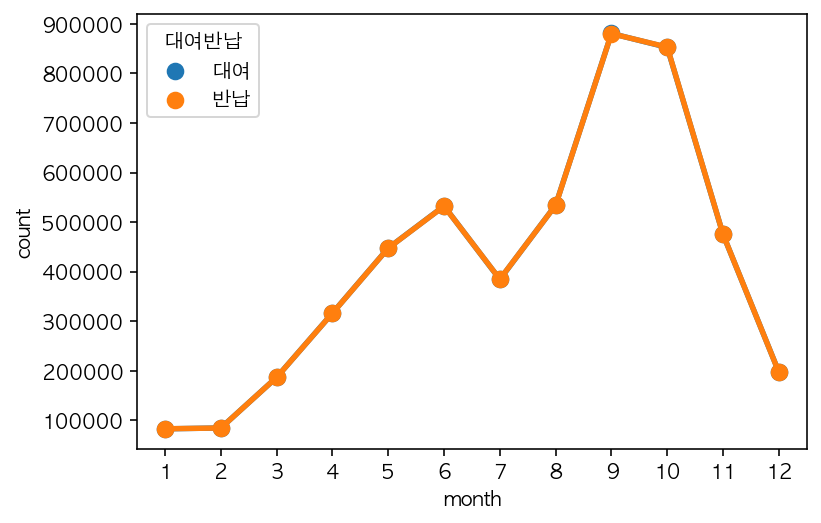

In [118]:
sns.pointplot(data=month_count, x="month", y="count", hue="대여반납")

### pivot table로 월별 대여반납 합계 구하기

In [ ]:
# pivot_table을 통해 월별 대여반납 합계를 구하고 df_month_pivot 변수에 담습니다.
df_month_pivot = month_count.pivot(index="month", 
                  values="count", columns="대여반납")
df_month_pivot

In [ ]:
# 대용량 데이터를 시각화 할 때는 pandas 로 
# 미리 집계한 데이터를 시각화 하는 것이 좀 더 빠릅니다. 
# plot을 통해 결과값을 그래프로 나타냅니다.
df_month_pivot.plot(figsize=(10, 4))

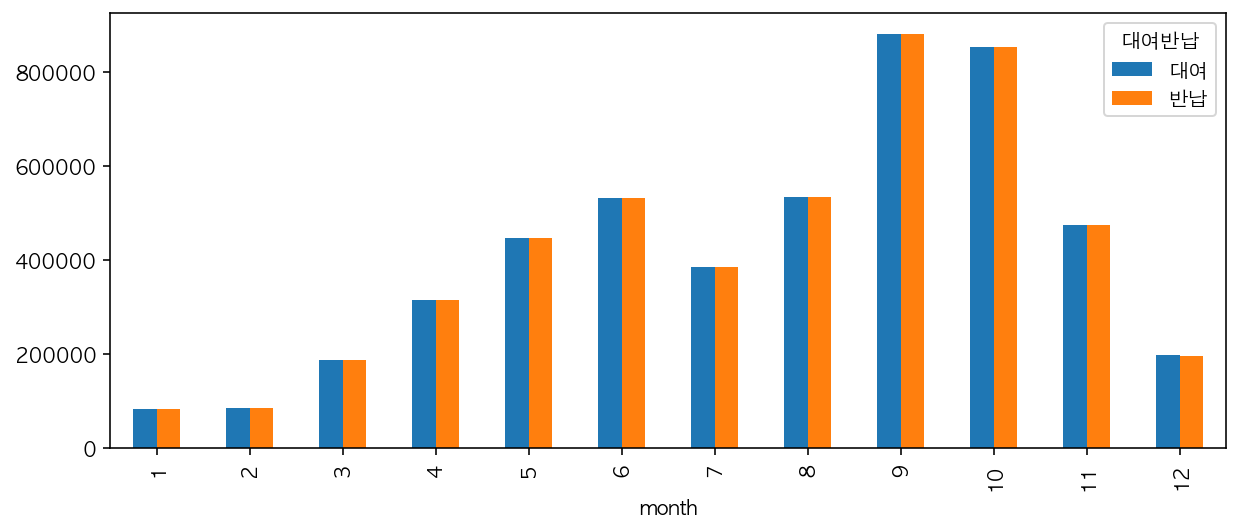

In [130]:
# 같은 데이터를 barplot으로 그립니다.
df_month_pivot.plot.bar(figsize=(10, 4))

In [ ]:
# seaborn 의 barplot을 통해서 그릴 수도 있습니다.


## 일자별 대여|반납 현황
* 날짜에 따라 대여|반납 횟수를 확인합니다.

In [ ]:
# value_counts를 통해 '대여일'별 대여수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['day', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 day컬럼으로 정렬합니다.
# 대여반납 컬럼을 만든 뒤 "대여" 값을 할당해 줍니다.


In [ ]:
# value_counts를 통해 '반납일'별 대여수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['day', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 day컬럼으로 정렬합니다.
# 대여반납 컬럼을 만든 뒤 "반납" 값을 할당해 줍니다.

In [ ]:
# concat를 활용해 대여, 반납 데이터프레임을 합쳐서 df_day 변수에 담습니다.


### pivot table로 일별 대여반납 합계 구하기

In [ ]:
# 대용량 데이터를 시각화 할 때는 pandas 로 
# 미리 집계한 데이터를 시각화 하는 것이 좀 더 빠릅니다. 
# 일별 자전거 대여수를 구합니다.

In [ ]:
# 위에서 그린 그래프를 seaborn의 pointplot과 barplot으로 그립니다.


### 해당연도 날짜 전체를 보기
* '대여년월일' 컬럼을 사용해서 대여/반납 데이터 만들기

In [ ]:
# value_counts를 통해 '대여연월일'별 대여수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['date', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 date컬럼으로 정렬합니다.
# 대여반납 컬럼을 만든 뒤 "대여" 값을 할당해 줍니다.
date_count_1 = df["대여연월일"].value_counts().reset_index()
date_count_1.columns = ['date', 'count']
date_count_1["대여반납"] = "대여"
date_count_1.head(1)

In [ ]:
# value_counts를 통해 '반납연월일'별 반납수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['date', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 date컬럼으로 정렬합니다.
# 반납반납 컬럼을 만든 뒤 "반납" 값을 할당해 줍니다.
date_count_2 = df["반납연월일"].value_counts().reset_index()
date_count_2.columns = ['date', 'count']
date_count_2["대여반납"] = "반납"
date_count_2.head(1)

In [139]:
# concat를 활용해 대여, 반납 데이터프레임을 합쳐서 df_ymd 변수에 담습니다.
date_count = pd.concat([date_count_1, date_count_2])

In [ ]:
# 시간데이터로 표현하기 위해 타입을 바꿔숩니다.
# 데이터 시각화 시 데이터 타입에 따라 표현이 달라집니다.
date_count["date"] = pd.to_datetime(date_count["date"])

plt.figure(figsize=(15, 4))
sns.barplot(data=date_count, x="date", y="count", ci=None)

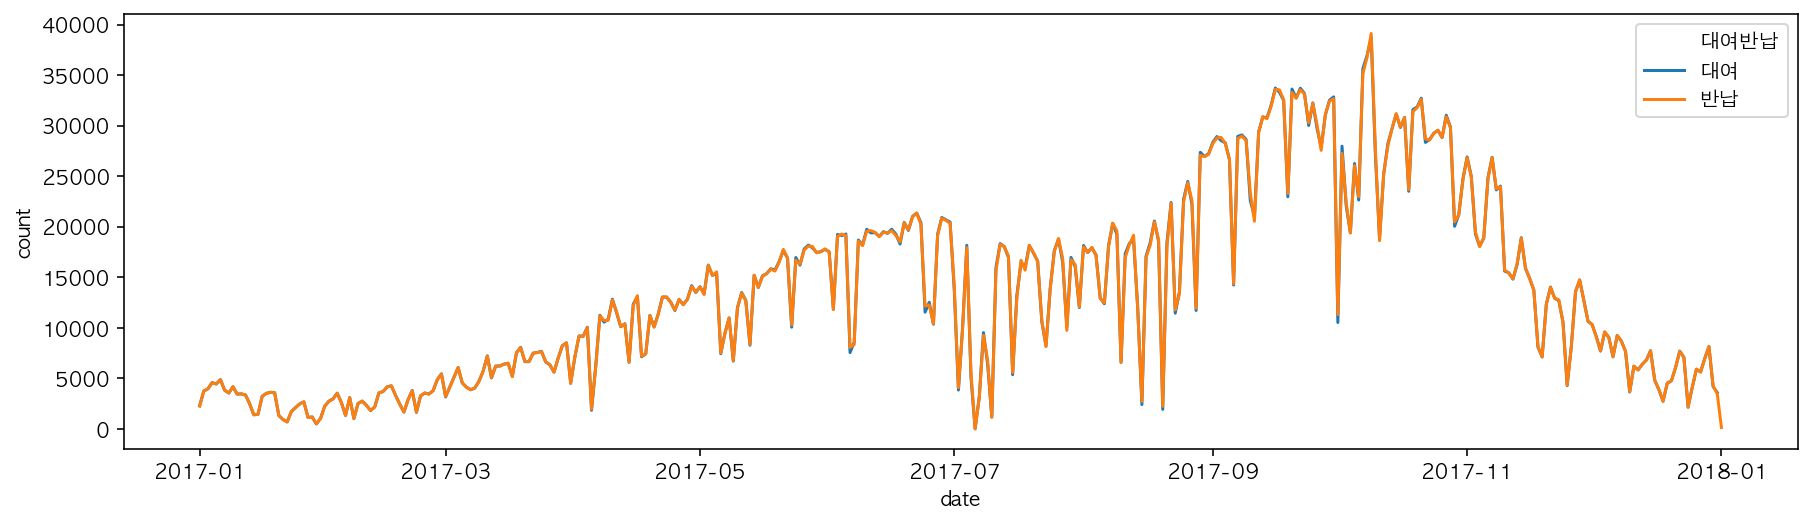

In [148]:
# 특정 기간동안의 따릉이 대여/반납 수를 seaborn 의 lineplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.lineplot(data=date_count, x="date", y="count", ci=None, hue="대여반납")

In [154]:
date_count = date_count.sort_values(["date", "대여반납"])

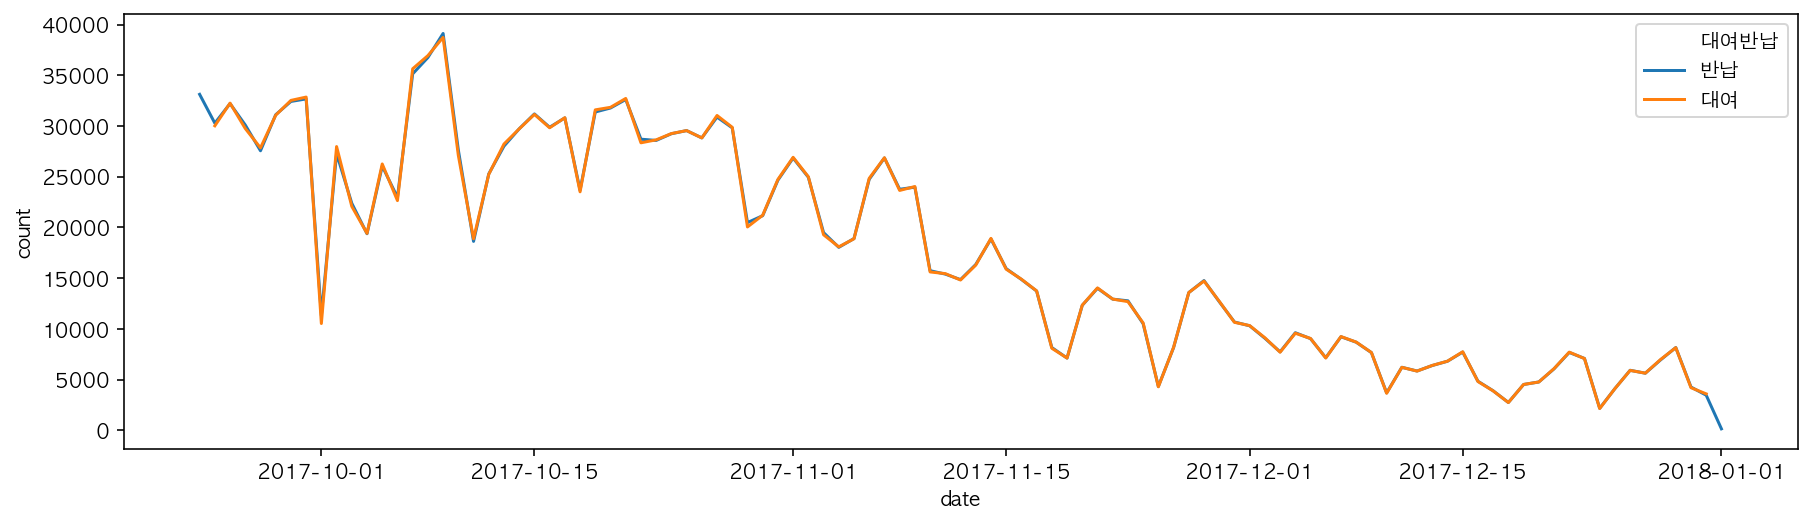

In [156]:
# 슬라이싱으로 최근 데이터를 불러오기 위해 날짜 기준으로 정렬되도록 합니다.

plt.figure(figsize=(15, 4))
sns.lineplot(data=date_count[-200:], x="date", y="count", ci=None, hue="대여반납")

* 대여수가 갑자기 줄어드는 날들이 있습니다. 날씨를 조회해 보면 해당 날짜에 비가 많이 내리거나 날씨가 좋지 않은 날임을 알 수 있습니다.

## 요일별 대여|반납 현황
* 대여|반납별로 어떤 요일에 주로 대여반납이 되는지 시각화해보기 위해 Tidy Data를 만듭니다.

In [163]:
# value_counts를 통해 '대여요일'별 대여수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['dayofweek', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 dayofweek 컬럼으로 정렬합니다.
# 대여반납 컬럼을 만든 뒤 "대여" 값을 할당해 줍니다.
week_count_1 = df["대여요일"].value_counts().reset_index()
week_count_1.columns = ['dayofweek', 'count']
week_count_1["대여반납"] = "대여"

In [164]:
# value_counts를 통해 '반납요일'별 반납수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['dayofweek', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 dayofweek 컬럼으로 정렬합니다.
# 반납반납 컬럼을 만든 뒤 "반납" 값을 할당해 줍니다.

week_count_2 = df["반납요일"].value_counts().reset_index()
week_count_2.columns = ['dayofweek', 'count']
week_count_2["대여반납"] = "반납"

In [166]:
# concat를 활용해 대여, 반납 데이터프레임을 합쳐서 df_dow 변수에 담습니다.
week_count = pd.concat([week_count_1, week_count_2])

In [168]:
# head 로 df_dow 에 담긴값을 확인합니다.
week_count.head(1)

,dayofweek,count,대여반납
0,3,743750,대여


In [169]:
# tail 로 df_dow 에 담긴값을 확인합니다.
week_count.tail(1)

,dayofweek,count,대여반납
6,6,650574,반납


In [171]:
# apply를 활용해서 숫자로 된 요일을 월화수목금토로 바꿔줍니다.
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
week_count["요일명"] = week_count["dayofweek"].map(weekday_map)

In [ ]:
"월화수목금토일"

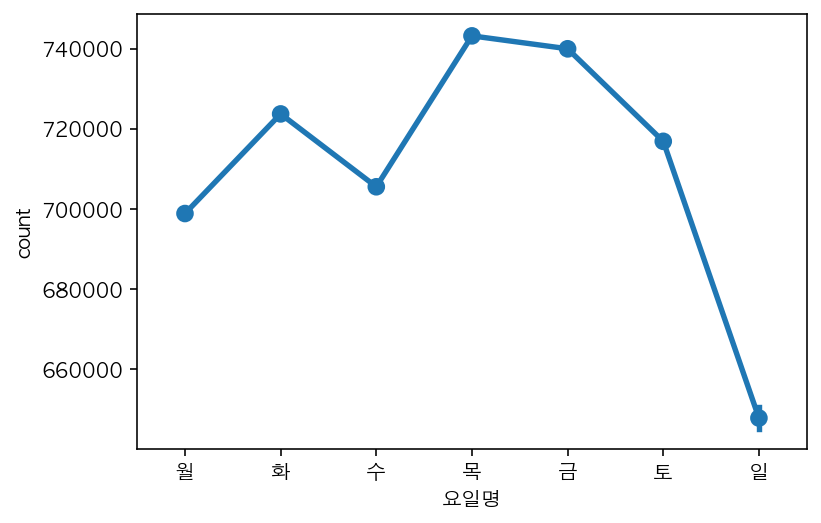

In [173]:
# seaborn의 pointplot과 barplot으로 요일별 자전거 대여수를 그립니다.

sns.pointplot(data=week_count, x="요일명", y="count", 
              order=["월", "화", "수", "목", "금", "토", "일"])

## 시간대별 대여|반납량

In [174]:
# value_counts를 통해 '대여시'별 대여수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['hour', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 hour 컬럼으로 정렬합니다.
# 대여반납 컬럼을 만든 뒤 "대여" 값을 할당해 줍니다.

hour_count_1 = df["대여시"].value_counts().reset_index()
hour_count_1.columns = ['hour', 'count']
hour_count_1["대여반납"] = "대여"

In [175]:
# value_counts를 통해 '반납시'별 대여수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['hour', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 hour 컬럼으로 정렬합니다.
# 대여반납 컬럼을 만든 뒤 "반납" 값을 할당해 줍니다.

hour_count_2 = df["반납시"].value_counts().reset_index()
hour_count_2.columns = ['hour', 'count']
hour_count_2["대여반납"] = "반납"

In [177]:
# concat를 활용해 대여, 반납 데이터프레임을 합쳐서 df_hour 변수에 담습니다.
hour_count = pd.concat([hour_count_1, hour_count_2])

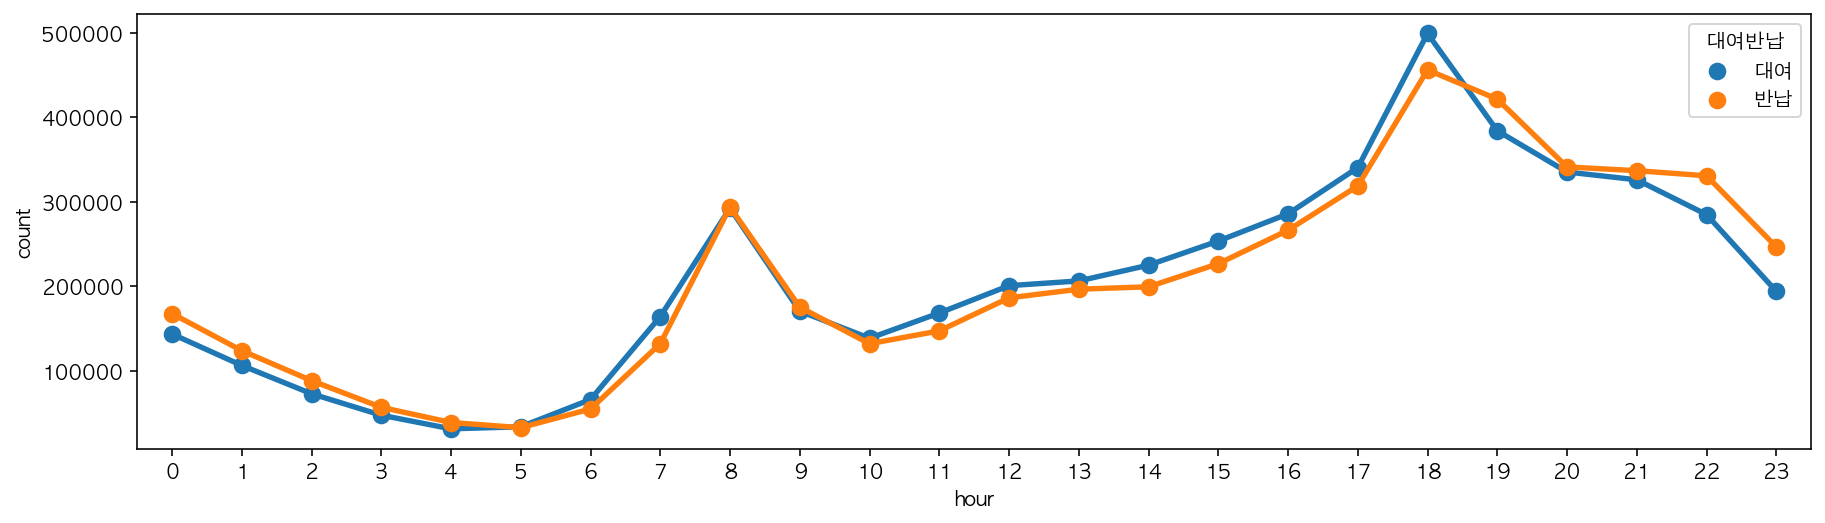

In [180]:
# seaborn의 pointplot과 barplot으로 시간대별 자전거 대여수를 그립니다.
plt.figure(figsize=(15, 4))
sns.pointplot(data=hour_count, x="hour", y="count", hue="대여반납")

* 새벽시간대로 갈 수록 대여/반납 수가 줄어듭니다.
* 출근시간대에는 대여가 반납보다 많습니다.
* 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
* 오전 11시부터 20시까지는 대여가 반납보다 많다.(대여>반납)
* 21시 이후부터 오전 4시까지는 대여보다 반납이 많다.(대여<반납)

In [ ]:
# value_counts를 통해 '대여분'별 대여수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['minute', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 minute 컬럼으로 정렬합니다.
# 대여반납 컬럼을 만든 뒤 "대여" 값을 할당해 줍니다.


In [ ]:
# value_counts를 통해 '반납분'별 대여수를 구합니다.
# 결과를 reset_index로 데이터프레임으로 만듭니다.
# 컬럼이름을 ['minute', 'count'] 로 지정합니다.
# 그리고 sort_values를 통해 minute 컬럼으로 정렬합니다.
# 대여반납 컬럼을 만든 뒤 "반납" 값을 할당해 줍니다.


In [ ]:
# concat를 활용해 대여, 반납 데이터프레임을 합쳐서 df_minute 변수에 담습니다.


In [ ]:
# seaborn의 pointplot과 barplot으로 분별 자전거 대여수를 그립니다.


* 대여/반납이 거의 비슷하게 이루어지고 있지만 대여는 0 ~ 20분 사이에 더 많이 일어나며 반납은 40 ~ 60분 사이에 더 많이 일어난다.

## 대여와 반납은 같은 곳에서 이루어지고 있을까?

In [183]:
# 같은대여반납소라는 컬럼을 새로 만들고 대여반납이 같은 곳에서 이루어지고 있는지 여부를 추가합니다.
# df['같은대여반납소'] 컬럼으로 생성합니다.

df["같은대여반납소"] = df["대여대여소번호"] == df["반납대여소번호"] 

In [187]:
# 같은대여반납소라는 컬럼의 값을 value_counts 로 카운트해서 대여반납수를 구합니다.
# 결과를 reset_index 로 데이터프레임 형태로 만들고 
# 컬럼명을 ['일치여부', '대여반납수'] 로 변경해 줍니다.

diff_station = df["같은대여반납소"].value_counts().reset_index()
diff_station.columns = ['일치여부', '대여반납수']
diff_station

,일치여부,대여반납수
0,False,4357985
1,True,617969


In [190]:
# 같은|다른 반납소별로 대여반납수가 몇 배나 차이가 나는지 확인한다.

diff_station.loc[0, "대여반납수"] / diff_station.loc[1, "대여반납수"]

7.052109410018949

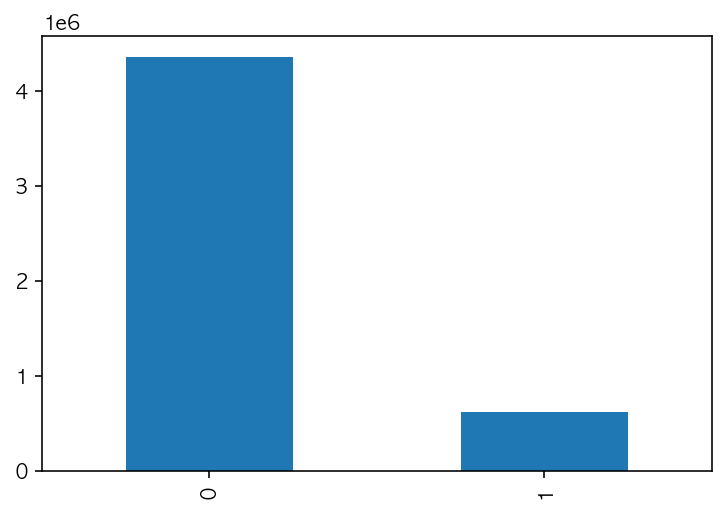

In [192]:
# "대여반납소 일치여부"
# df_location_diff 로 계산한 결과를 pandas의 bar plot으로 그립니다.

diff_station["대여반납수"].plot.bar()

같은 곳에서 대여반납을 하는 것보다 다른 곳으로의 대여반납이 훨씬 많은 것을 확인할 수 있다.

In [196]:
# 같은 대여반납소인 데이터프레임을 df_same_loc 라는 변수에 담습니다.

df_same_loc = df[df["같은대여반납소"] == True].copy()

In [199]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)
# 대여대여소명 으로 같은 곳에서 대여반납이 이루어지는 대여소를 미리보기로 가져옵니다.

df_same_loc["대여대여소명"].value_counts().head(10)

 여의나루역 1번출구 앞     18472
 뚝섬유원지역 1번출구 앞    13268
 월드컵공원             8096
 서울숲역 4번 출구 옆      7182
 마포구민체육센터 앞        6334
 옥수역 3번출구          4341
 외국어대 정문 앞         4045
 당산육갑문             3919
 청계천 생태교실 앞        3811
 CJ 드림시티           3754
Name: 대여대여소명, dtype: int64

* 같은 곳에서 대여반납이 이루어지는 대여소들은 한강주변이나 공원 주변에 위치한 것을 확인해 볼 수 있다.

## 같은|다른 대여소에서 대여가 되는 자전거의 평균 이용시간
### 같은 대여반납소

In [201]:
df_same_loc["이용시간(분)"].describe()

count    617969.000000
mean         54.748194
std          40.622421
min           2.000000
25%          28.000000
50%          49.000000
75%          73.000000
max        2582.000000
Name: 이용시간(분), dtype: float64

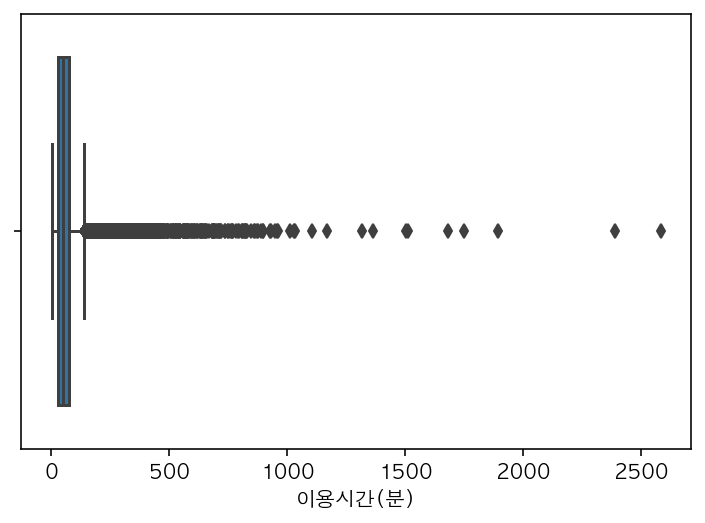

In [202]:
sns.boxplot(df_same_loc["이용시간(분)"])

In [200]:
print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', df_same_loc["이용시간(분)"].mean() )

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  54.74819448872031


In [210]:
# pivot_table을 통해 '대여대여소명', '대여대여소번호', '반납대여소명'을 기준으로 
# 평균이용시간과 횟수를 구합니다.

same_table = df_same_loc.pivot_table(index=["대여대여소명",'대여대여소번호'], 
                        values="이용시간(분)", aggfunc=["mean", "count"])
same_table.columns = ["평균이용시간", "이용횟수"]

In [213]:
# 평균이용시간이 높은 순으로 정렬합니다.
same_table.sort_values("평균이용시간", ascending=False).head(10)

,,평균이용시간,이용횟수
대여대여소명,대여대여소번호,,
신사동 가로수길 입구,2362,232.555556,9
한국종합기술사옥 앞,1023,175.000000,5
e 편한세상 보문아파트 내,1352,93.000000,2
하나로마트 창동점,1716,91.500000,2
서초4동주민센터,2268,86.400000,5
구로1동우체국 앞,1979,84.000000,1
이수역 4번 출구,2230,82.822785,474
서울 월드컵 경기장,199,82.788280,1587
중곡역 1번출구,3502,80.500000,8


In [214]:
# 이용횟수가 많은 곳으로 정렬합니다.

same_table.sort_values("이용횟수", ascending=False).head(10)

,,평균이용시간,이용횟수
대여대여소명,대여대여소번호,,
여의나루역 1번출구 앞,207,69.272142,18472
뚝섬유원지역 1번출구 앞,502,60.914154,13268
월드컵공원,186,59.284461,8096
서울숲역 4번 출구 옆,511,66.991924,7182
마포구민체육센터 앞,152,55.294127,6334
옥수역 3번출구,565,56.982723,4341
외국어대 정문 앞,634,58.977503,4045
당산육갑문,272,63.043634,3919
청계천 생태교실 앞,583,51.524009,3811


In [ ]:
# 이용횟수를 pandas plot의 히스토그램으로 그립니다.

same_table["이용횟수"].hist()

In [ ]:
# bin 의 갯수를 조정해서 그려봅니다.


same_table["이용횟수"].hist(bins=100)

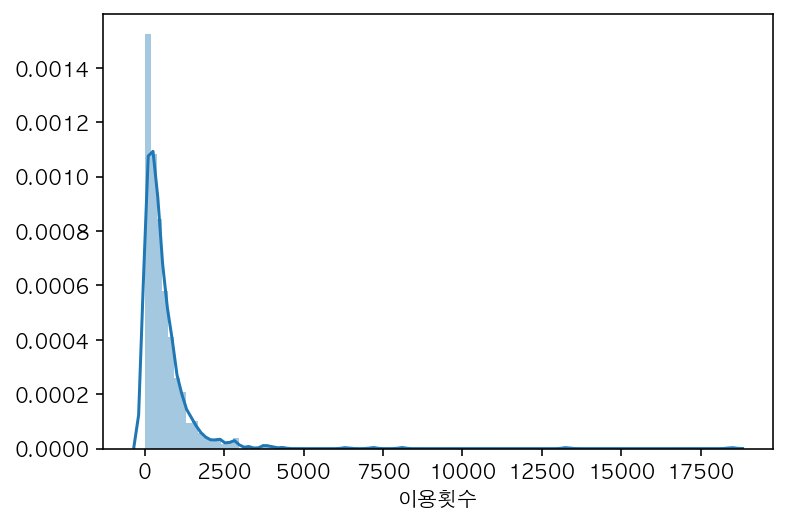

In [221]:
# 이용횟수를 seaborn의 distplot 으로 그립니다.

sns.distplot(same_table["이용횟수"], bins=100)

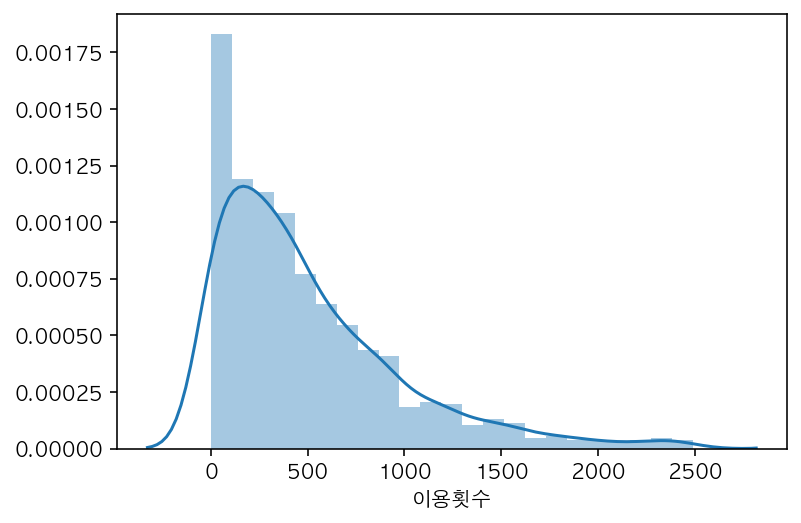

In [225]:
same_table_low = same_table[same_table["이용횟수"] < 2500]

sns.distplot(same_table_low["이용횟수"])

### 다른 대여|반납소

In [ ]:
# df['같은대여반납소'] == False 인 값으로 다른대여반납소를 구해 
# df_diff_loc 변수에 담습니다.



In [ ]:
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ',)

In [ ]:
# pivot_table을 통해 '대여대여소명', '대여대여소번호', '반납대여소명'을 기준으로 
# 평균이용시간과 횟수를 구합니다.


In [ ]:
# sort_values로 평균이용시간이 높은 순으로 10개를 가져옵니다.



In [ ]:
# sort_values로 이용횟수가 높은 순으로 10개를 가져옵니다.


In [ ]:
rent_mean_time = 0
print('같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이')
print(f'다른 대여소의 대여반납 이용시간보다 {rent_mean_time:.2f} 분 많다.')

* 이용횟수가 많은 대여소라고 해서 평균이용시간이 평균보다 높지는 않습니다.
* 관련기사
    * ['따릉이' 타고 가장 많이 다닌 경로는? - 통플러스](http://news.tongplus.com/site/data/html_dir/2018/10/24/2018102402585.html)
    * [[ONE SHOT] 따릉이, ‘이곳’서 가장 많이 빌리고 ‘여기’서 가장 많이 탄다](https://news.joins.com/article/23003297)

## 해당 기간동안 가장 많이 이용된 자전거는 몇 회 대여 되었을까?

### describe를 통해 가장 많이 대여된 자전거번호 구하기

In [ ]:
# describe를 통해 자전거번호를 요약하면 가장 많이 대여된 자전거의 대여 횟수를 알수 있습니다.



### value_counts를 통해 가장 많이 대여된 자전거번호 구하기

In [ ]:
# 자전거 번호별 대여수를 구해서 데이터프레임으로 만들어 bike_rent_counts 변수에 담습니다.


In [ ]:
print('해당 기간동안 자전거 하나당 평균 대여 수:', )
print('자전거 하나당 가장 많이 대여된 횟수:', )
print('자전거 하나당 가장 적게 대여된 횟수:', )

In [ ]:
# Pandas 로 자전거 대여 횟수에 대한 히스토그램 그리기


In [ ]:
# bin의 갯수를 늘려서 그려봅니다.


In [ ]:
# seaborn 의 distplot으로 자전거 하나당 특정 기간동안 대여된 횟수를 그리기


In [ ]:
# 가장 많이 대여된 자전거의 대여이력을 most_bike_df 변수에 담습니다.


In [ ]:
# 가장많이 대여된 자전거의 대여이력에서 대여대여소명별로 횟수를 셉니다.



In [ ]:
# 가장많이 대여된 자전거가 거쳐간 대여소를 시각화 하기 위해 
# unique 를 통해 대여소가 중복되지 않게 구합니다.


In [ ]:
# 자전거 대여소 정보가 있는 csv 파일을 불러옵니다.
stations = pd.read_csv('data/seoul_bike_station.csv')
stations.shape

In [ ]:
# Series 형태의 rent_station 을 merge로 병합하기 위해 데이터프레임으로 만듭니다.
# 그리고 컬럼의 이름을 대여소로 변경합니다.
# 데이터프레임은 bike_move_df 로 합니다.


In [ ]:
# 대여소명에 앞뒤로 공백이 들어가 있는 것들이 있습니다.
# str.strip() 으로 제거합니다.



## merge 를 통해 대여소 정보 병합하기

In [ ]:
# 대여소를 기준으로 데이터를 병합합니다.
# bike_move_df 와 불러온 대여소 정보를 merge 합니다.


In [ ]:
# info로 merge 된 데이터프레임의 정보를 봅니다.


In [ ]:
# head 로 미리보기를 합니다.



### 결측치 구하기
* 대여소 정보가 없는 데이터가 얼마나 되는지 찾습니다.

In [ ]:
# 결측치의 수를 구합니다.


In [ ]:
# 정보가 없는 대여소로 위경도를 주소정보 등으로 다시 가져올 필요가 있습니다.


## 가장 많이 대여된 자전거가 거쳐간 대여소

In [ ]:
# 지도 표현을 위해 folium 을 import 합니다.
# 데이터 프레임에서 위도와 경도의 평균값을 구합니다. 
# 이 값으로 지도의 중심이 될 좌표를 정합니다.
# zoom_start는 지도를 얼마나 확대해서 표현하는지를 의미합니다.
# tiles는 지도의 스타일입니다.



## 캐글 필사 과제
* [Bike Sharing Demand | Kaggle](https://www.kaggle.com/c/bike-sharing-demand/notebooks)
* [New York City Taxi Trip Duration | Kaggle](https://www.kaggle.com/c/nyc-taxi-trip-duration/notebooks)